# Data Mining Project - Predicting Interest Rates
Markus Kängsepp

## Merge all data from year 2016

In [28]:
file1 = "data_loan/LoanStats_securev1_2016Q1.csv"
file2 = "data_loan/LoanStats_securev1_2016Q2.csv"
file3 = "data_loan/LoanStats_securev1_2016Q3.csv"
file4 = "data_loan/LoanStats_securev1_2016Q4.csv"

f_desc = "data_loan/loan_desc.csv"

In [29]:
dataQ1 <- read.csv(file1, skip = 1)  # Added line with description so skip = 2.
dataQ2 <- read.csv(file2, skip = 1)
dataQ3 <- read.csv(file3, skip = 1)
dataQ4 <- read.csv(file4, skip = 1)

In [30]:
head(dataQ1)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
76153534,NA,28000,28000,28000,36 months,6.49%,858.05,A,A2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76153691,NA,7200,7200,7200,36 months,8.39%,226.92,B,B1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75993542,NA,10850,10850,10850,36 months,13.67%,369.10,C,C3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75273614,NA,2000,2000,2000,36 months,28.34%,83.10,G,G3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75359225,NA,20000,20000,20000,36 months,5.32%,602.30,A,A1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
74805010,NA,3000,3000,3000,36 months,9.75%,96.45,B,B3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Add description to column names to get better understanding of the data

In [97]:
n = length(colnames(dataQ1))

col_desc = rep("", n)


for(i in c(1:128))
{
    #print(colnames(dataQ1)[i])
    #print(as.character(desc[desc$V1 == colnames(dataQ1)[i], 2][1]))
    d = as.character(desc[desc$V1 == colnames(dataQ1)[i], 2])
    if(length(d) == 0)
    {
        d = ""
    }
    
    col_desc[i] = d
    
}

col_desc = cbind(colnames(dataQ1), col_desc)

In [103]:
write.table(t(col_desc), file = "data_loan/sorted_desc.csv", sep = ",", col.names = F, row.names = F)

### Selecting initial columns that may be useful

In [ ]:
## total_acc (37) last interesting row
#colnames(dataQ1)[37]

# Put all data to one data.frame
data16 = rbind(head(dataQ1[, c(1:37)],-2), head(dataQ2[, c(1:37)],-2), head(dataQ3[, c(1:37)],-2), head(dataQ4[, c(1:37)],-2))

In [54]:
tail(data16)
data16[59470,]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
434402,89955820,NA,24000,24000,24000,60 months,10.49%,515.74,B,B3,...,725,729,0,NA,42,15,2,22448,22.4%,22
434403,89885898,NA,24000,24000,24000,60 months,12.79%,543.50,C,C1,...,665,669,0,NA,NA,5,0,49431,84.4%,54
434404,88977788,NA,24000,24000,24000,60 months,10.49%,515.74,B,B3,...,695,699,1,60,69,24,1,21665,39%,58
434405,88985880,NA,40000,40000,40000,60 months,10.49%,859.56,B,B3,...,705,709,1,9,NA,5,0,8633,64.9%,37
434406,88224441,NA,24000,24000,24000,60 months,14.49%,564.56,C,C4,...,660,664,0,67,72,10,1,17641,68.1%,31
434407,88215728,NA,14000,14000,14000,60 months,14.49%,329.33,C,C4,...,660,664,1,37,NA,8,0,7662,54%,22


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
59470,72565730,NA,8000,8000,8000,36 months,10.75%,260.97,B,B4,...,670,674,2,16,NA,16,0,10284,62%,39


In [55]:
#write.csv(data2016, "data_loan/data16.csv", row.names = F)  # For some reason turns some months to numbers... i.e Jan-16 to 42401

In [56]:
data16 <- read.csv("data_loan/data16.csv")

In [57]:
head(data16[,c(1:10)])
head(data16[,c(10:20)])

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
76153534,NA,28000,28000,28000,36 months,6.49%,858.05,A,A2
76153691,NA,7200,7200,7200,36 months,8.39%,226.92,B,B1
75993542,NA,10850,10850,10850,36 months,13.67%,369.10,C,C3
75273614,NA,2000,2000,2000,36 months,28.34%,83.10,G,G3
75359225,NA,20000,20000,20000,36 months,5.32%,602.30,A,A1
74805010,NA,3000,3000,3000,36 months,9.75%,96.45,B,B3


sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
A2,IT,10+ years,MORTGAGE,117000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76153534,
B1,Director of Slots,10+ years,RENT,197000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=76153691,
C3,Manager,10+ years,MORTGAGE,44000,Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75993542,
G3,security officer,2 years,RENT,24000,Verified,Mar-16,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75273614,
A1,President,10+ years,MORTGAGE,165000,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=75359225,
B3,sales,< 1 year,RENT,24000,Source Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=74805010,


In [34]:
str(data16$emp_length)

 Factor w/ 13 levels "","< 1 year",..: 4 4 4 5 4 2 6 6 3 12 ...


In [53]:
data16[59470,]
head(dataQ1, -2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
59470,72565730,NA,8000,8000,8000,36 months,10.75%,260.97,B,B4,...,670,674,2,16,NA,16,0,10284,62%,39


id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
76153534,NA,28000,28000,28000,36 months,6.49%,858.05,A,A2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76153691,NA,7200,7200,7200,36 months,8.39%,226.92,B,B1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75993542,NA,10850,10850,10850,36 months,13.67%,369.10,C,C3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75273614,NA,2000,2000,2000,36 months,28.34%,83.10,G,G3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75359225,NA,20000,20000,20000,36 months,5.32%,602.30,A,A1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
74805010,NA,3000,3000,3000,36 months,9.75%,96.45,B,B3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76042475,NA,6000,6000,6000,36 months,10.75%,195.73,B,B4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75061834,NA,20000,20000,20000,36 months,11.47%,659.24,B,B5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
75933549,NA,24000,24000,24000,60 months,19.53%,629.60,D,D5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
76143686,NA,9000,9000,9000,36 months,15.31%,313.36,C,C5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Clean Data with OpenRefine

Changes made to data using OpenRefine:
- emp_length: changed to numeric, where <1 years is 0 and 10+ years is 10
- int_rate: changed to numeric
- removing blank lines (last 2 rows for each quarter) - that contained info about total amount founded by policy code 1 and 2.
- removing unnecessary features that are cannot be used for assigning interest rate: 
    - id
    - member_id
    - loan status (is not known at the moment of assigning interest rate)
    - payment plan (only yes - if trouble paying loan)
    - installment (calculated from interest and loan amount) - so direct correlation
    - emp_title - too many different titles, should cluster before
    - url - to given case (need to be member in Lending Club to check this)
    - desc - only couple of descriptions
    - title - subtitle of purpose (only little more information, mostly overlapping)
    


## Predicting Interest Rates

In [1]:
train_data <- read.csv("data_loan/data16_cleaned.csv")

In [2]:
nrow(train_data)

[1] 434407

In [14]:
set.seed(3)
sample <- sample(nrow(train_data), 10000)
sample_data <- train_data[sample,]

# Remove int_rate, grade, sub_grade - all these are targets, also 18 - earliest_cr_line      
sub_sample_data <- sample_data[, c(-5, -6, -7, -18)]
sub_train_data <- train_data[, c(-5,-6,-7, -18)]

In [16]:
# Data without unnecessary stuff (5,6,7,18)
sub_data1 <- cbind(sub_sample_data, sample_data$int_rate)
colnames(sub_data1)[ncol(sub_data1)] = "int_rate"

sub_train_data1 <- cbind(sub_train_data, train_data$int_rate)
colnames(sub_train_data1)[ncol(sub_train_data1)] = "int_rate"

sub_data2 <- cbind(sub_sample_data, sample_data$grade)
colnames(sub_data2)[ncol(sub_data2)] = "grade"

### Linear Regression

In [48]:
# Calculate Root Mean Squared Error (RMSE)
rmse <- function(actual, predicted)
{
    error <- actual - predicted
    return(sqrt(mean(error^2)))  
    # sum(error^2)/n, can be used also <- n, n-1, n-2 (n-1, n-2 for some statistical reasons can be also used)
}

# Function to get model and RMSE and adjusted R-Square values
get_model <- function(formula, dat, y, trace = TRUE)
{
    model <- lm(formula, dat)
    y.pred <- predict(model)
    if(trace)
    {
        print(sprintf("For given model the RMSE is %0.3f.", rmse(y, y.pred)))
        print(sprintf("For given model the Adjusted R-Squared is %0.3f.", summary(model)$adj.r.squared))
    }

    return(model)
}

In [5]:
form1 <- int_rate ~ 1
model <- get_model(form1, dat = train_data, y = train_data$int_rate)
summary(model)

[1] "For given model the RMSE is 4.930."
[1] "For given model the Adjusted R-Squared is 0.000."



Call:
lm(formula = formula, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-7.723 -3.554 -1.054  2.546 17.947 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043504   0.007481    1744   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.93 on 434406 degrees of freedom


In [7]:
train_data$emp_length <- as.numeric(as.character(train_data$emp_length))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [ ]:
form2 <- int_rate ~ loan_amnt + annual_inc + dti + term + verification_status + issue_d + 
delinq_2yrs + fico_range_low + fico_range_high + open_acc + pub_rec + revol_bal + total_acc
test_form <- int_rate ~ zip_code + term + fico_range_low + dti
# Features left out
# Contain NA-s: emp_length (28214), inq_last_6mths (1), revol_util (264), What to do with NA-s just skip?
# earliest_cr_line DONT use that to model (too many factor levels...), zip_code also
# not significant: purpose
# Grade and subgrade are outcome (depends on the interest rate)
model2 <- get_model(form2, dat = train_data, y = train_data$int_rate)
#summary(model2)
model3 <- get_model(form2, dat = sample_data, y = sample_data$int_rate)
#sum(is.na(train_data$total_acc))

### Gradient Boosting

Seems to give best results out of all the tried methods

In [7]:
# Libraries
library(caret)
library(Metrics)
library(gbm)

In [30]:
# Formulas from linear regression
formula1 <- int_rate ~ loan_amnt + annual_inc
formula2 <- int_rate ~ loan_amnt + annual_inc + dti + term + verification_status + issue_d
formula3 <- int_rate ~ loan_amnt + annual_inc + dti + term + verification_status + issue_d + 
delinq_2yrs + fico_range_low + fico_range_high + open_acc + pub_rec + revol_bal + total_acc

formula4 <- int_rate ~ loan_amnt + annual_inc + dti + verification_status + issue_d + 
delinq_2yrs + fico_range_low + fico_range_high + open_acc + pub_rec + revol_bal + total_acc

In [27]:
gbmFit4 <- train(formula3, data = sample_data, method = "gbm",verbose = FALSE)  # Verbose 

In [18]:
y.pred <- predict(gbmFit1, train_data)
rmse(train_data$int_rate, y.pred)

[1] 4.637997

In [25]:
y.pred <- predict(gbmFit2, train_data)
rmse(train_data$int_rate, y.pred)

[1] 4.045875

In [52]:
y.pred <- predict(gbmFit3, sample_data)
rmse(sample_data$int_rate, y.pred)

[1] 3.570983

#### Let's find best values for gradient boosting.

Gradient Boosting seems to give best results, so let's try different values for variables.

In [57]:
#fitControl <- trainControl(method = "repeatedcv", number = 5, repeats = 3)
#gbmFit1 <- train(int_rate ~ ., data = sub_data1, method = "gbm", trControl = fitControl, verbose = FALSE)

In [8]:
gbm.model1 <- gbm(int_rate ~ ., data = sub_data1,
n.trees=1000,
shrinkage=0.05,
distribution="gaussian",
interaction.depth=7,
bag.fraction=0.9,
cv.fold=5,
n.minobsinnode = 50)

In [9]:
#gbm.perf(gbm.model1)
gbm.model1

gbm(formula = int_rate ~ ., distribution = "gaussian", data = sub_data1, 
    n.trees = 1000, interaction.depth = 7, n.minobsinnode = 50, 
    shrinkage = 0.05, bag.fraction = 0.9, cv.folds = 5)
A gradient boosted model with gaussian loss function.
1000 iterations were performed.
The best cross-validation iteration was 59.
There were 24 predictors of which 12 had non-zero influence.

,var,rel.inf
zip_code,zip_code,57.502574027
term,term,13.935255358
fico_range_low,fico_range_low,10.271606754
dti,dti,3.470005663
verification_status,verification_status,3.346861976
purpose,purpose,1.829188736
issue_d,issue_d,1.824651505
inq_last_6mths,inq_last_6mths,1.604789015
annual_inc,annual_inc,1.351463764
revol_bal,revol_bal,0.897678953


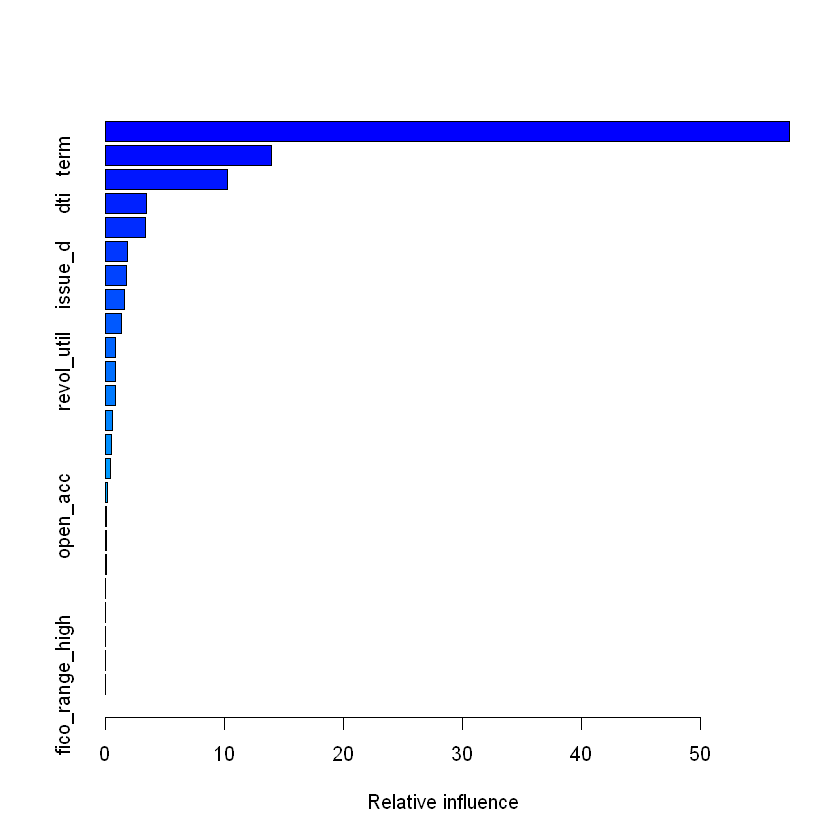

In [10]:
summary(gbm.model1)
# Zip_code has over 50% of relative influence da actual fck.

Zip_code most influential - weird.

In [11]:
y.pred <- predict(gbm.model1, n.trees = 1000, sub_data1)
rmse(sample_data$int_rate, y.pred)

[1] 1.51477

Let's pick random test sample. To see how well it performs on validation set.

In [54]:
# First remove sample lines from all data lines.
#set.seed(10)
sample_val <- sample(nrow(train_data)[-sample], 10000)
val_sample <- train_data[sample_val,]
y.pred <- predict(gbm.model1, n.trees = 1000, val_sample)
rmse(val_sample$int_rate, y.pred)

[1] 4.694643

Atm really overfitting.. Let's use more data

In [ ]:
gbm.model2 <- gbm(int_rate ~ ., data = sub_train_data1,
n.trees=1000,
shrinkage=0.05,
distribution="gaussian",
interaction.depth=7,
bag.fraction=0.9,
cv.fold=5,
n.minobsinnode = 50)

In [ ]:
summary(gbm.model1)

In [ ]:
y.pred <- predict(gbm.model2, n.trees = 1000, sub_train_data1)
rmse(sub_train_data1$int_rate, y.pred)

Also try testing on real test data 2017.

### Naive Bayes

Could use Naive Bayes that to predict grade.

Bad results with sample data, let's try on bigger data.

In [104]:
data1 <- cbind(sub_train_data, train_data$grade)
colnames(data1)[ncol(data1)] = "grade"
head(data1)

loan_amnt,funded_amnt,funded_amnt_inv,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,...,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,grade
28000,28000,28000,36 months,10,MORTGAGE,117000,Not Verified,Mar-16,debt_consolidation,...,729,1,NA,NA,10,0,31704,81.9,23,A
7200,7200,7200,36 months,10,RENT,197000,Not Verified,Mar-16,car,...,679,1,NA,71,9,1,762,5.4,28,B
10850,10850,10850,36 months,10,MORTGAGE,44000,Verified,Mar-16,credit_card,...,664,0,58,59,11,1,12347,64.3,26,C
2000,2000,2000,36 months,2,RENT,24000,Verified,Mar-16,other,...,664,3,33,23,7,1,1728,59.6,11,G
20000,20000,20000,36 months,10,MORTGAGE,165000,Not Verified,Mar-16,debt_consolidation,...,719,0,NA,NA,14,0,20577,32.6,30,A
3000,3000,3000,36 months,0,RENT,24000,Source Verified,Mar-16,vacation,...,719,0,NA,NA,13,0,3651,16.4,13,B


In [31]:
library(e1071)

In [105]:
formula3_1 <- grade ~ loan_amnt + annual_inc + dti + term + verification_status + issue_d + 
delinq_2yrs + fico_range_low + fico_range_high + open_acc + pub_rec + revol_bal + total_acc

In [106]:
nB <- naiveBayes(grade ~ ., data = data1)

In [107]:
target_col <- which(colnames(sample_data) == "grade")

y.pred <- predict(nB, train_data[,-target_col],type = "class")

In [112]:
str(y.pred)
str(train_data$grade)
sum(train_data$grade == y.pred)
nrow(train_data)

rmse(as.numeric(y.pred), as.numeric(train_data$grade))

head(train_data$grade)
head(y.pred)

 Factor w/ 7 levels "A","B","C","D",..: 1 2 2 4 1 2 2 2 5 2 ...
 Factor w/ 7 levels "A","B","C","D",..: 1 2 3 7 1 2 2 2 4 3 ...


[1] 170940

[1] 434407

[1] 1.221696

[1] A B C G A B
Levels: A B C D E F G

[1] A B B D A B
Levels: A B C D E F G

In [145]:
# Epic accuracy!!!
170940/nrow(train_data)*100

[1] 39.35019

Not the best overall accuracy, however the grade missing on average by 1.22.

### SVM

In [139]:
svm.model <- svm(formula3, data = data2, cost = 10, gamma = 1)
svm.model


Call:
svm(formula = formula3, data = data2, cost = 10, gamma = 1)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  9042


In [142]:
svm.pred <- predict(svm.model, data2[,-ncol(data2)])
head(svm.pred)

48413    56028   102899   343661    92518   296255 
12.47804 13.97297 17.48244 19.50225 10.23875 14.50318

In [143]:
length(svm.pred)
length(data2$int_rate)
rmse(svm.pred, data2$int_rate)
# Something wrong 825 predictions

[1] 825

[1] 10000

Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"

[1] 6.724567

In [ ]:
# SVM to predict interest grade
#svm.model <- svm(formula3_1, data = data1, cost = 100, gamma = 1)
# Formula3_1 slower than using all the data.., is there some necessary feature missing

In [22]:
# SVM to predict interest grade
svm.model2 <- svm(grade ~ ., data = sub_data2, cost = 100, gamma = 1)


ERROR: Error in eval(expr, envir, enclos): object 'data1' not found


In [ ]:
svm.pred <- predict(svm.model2, sub_data2[,-ncol(sub_data2)])
head(svm.pred)

In [ ]:
length(svm.pred)
length(sub_data2$int_rate)
rmse(svm.pred, sub_data2$grade)